# Linear Programming

Tipo diverso di algoritmi rispetto a Local Search.

Questo tipo di algoritmi cerca di ottimizzare un'equazione lineare ($y = ax₁ + bx₂ + …$)

## Componenti di Linear Programming

- Una funzione costo che vogliamo minimizzare: $c₁x₁ + c₂x₂ + … + cₙxₙ$
  - Qui, ogni $x_{i}$ è una variabile associata ad un certo costo $c_{i}$

- Un vincolo rappresentato da una somma di variabili che è minore o uguale a un valore ($a₁x₁ + a₂x₂ + … + aₙxₙ ≤ b$) o precisamente uguale a questo valore ($a₁x₁ + a₂x₂ + … + aₙxₙ = b$)
  - In questo caso, $x_{i}$ è una variabile, $a_{i}$ è una risorsa associata ad essa e $b$ rappresenta quante risorse possiamo dedicare al problema

- Presenza di limiti individuali per ogni variabile (ad esempio, la variabile non può essere negativa) nella forma: $lᵢ ≤ xᵢ ≤ uᵢ$

### Esempio

**Dati:**

- Due macchine, $X₁$ e $X₂$. Il costo di funzionamento di $X₁$ è €50/ora, $X₂$ costa €80/ora. L'obiettivo è minimizzare il costo.
  - Posso formalizzarla come cost function: $50x₁ + 80x₂$

- $X₁$ richiede 5 unità di lavoro per ora. $X₂$ richiede 2 unità di lavoro per ora. Ho un totale di 20 unità di lavoro da poter spendere.
  - Formalizzabile nel vincolo: $5x₁ + 2x₂ ≤ 20$

- $X₁$ produce 10 unità di output per ora. $X₂$ produce 12 unità di output per ora. L'azienda ha bisogno di 90 unità di output.
  - Questo è un altro vincolo, che può essere scritto come: $10x₁ + 12x₂ ≥ 90$
  - Tuttavia, i vincoli devono essere scritti nella forma: $(a₁x₁ + a₂x₂ + … + aₙxₙ ≤ b)$ oppure $(a₁x₁ + a₂x₂ + … + aₙxₙ = b)$. Moltiplichiamo, quindi, per $-1$ per ottenere un'equazione equivalente desiderata: $(-10x₁) + (-12x₂) ≤ -90$

**Richiesta:** Quante ore devo usare $X₁$ e $X₂$ per essere efficiente?

Un problema del genere può essere risolto, senza fare ricorso a geometria e algebra. tramite algoritmi già esistenti, ad esempio:

- Simplex
- Interior Point

Risoluzione in codice con la libreria `scipy`. La funzione .linprog() usa un algoritmo chiamato highs.

In [1]:
import scipy.optimize

# Objective Function: 50x_1 + 80x_2
# Constraint 1: 5x_1 + 2x_2 <= 20
# Constraint 2: -10x_1 + -12x_2 <= -90

result = scipy.optimize.linprog(
    [50, 80],  # Cost function: 50x_1 + 80x_2
    A_ub=[[5, 2], [-10, -12]],  # Coefficients for inequalities
    b_ub=[20, -90],  # Constraints for inequalities: 20 and -90
)

if result.success:
    print(f"X1: {round(result.x[0], 2)} hours")
    print(f"X2: {round(result.x[1], 2)} hours")
else:
    print("No solution")

X1: 1.5 hours
X2: 6.25 hours


# Constraint Satisfaction

Classe di problemi in cui abbiamo un certo numero di variabili a cui devono essere assegnati valori che soddisfato dei vincoli

## Componenti dei problemi di Constraint Satisfaction

- Set di variabili: $[x₁, x₂, …, xₙ]$
- Set di domini per ogni variabile: $\{D₁, D₂, …, Dₙ\}$
- Set di vincoli: $C$

## Termini utili

**Tipi di vincoli:**

- Un **vincolo rigido** (Hard Constraint) è un vincolo che <u>deve</u> essere soddisfatto in una soluzione corretta.

- Un **vincolo morbido** (Soft Constraint) è un vincolo che esprime una preferenza, indicando quali soluzioni sono più desiderabili rispetto ad altre.

**Numeri di vincoli:**

- Un **vincolo unario** (Unary Constraint) è un vincolo che coinvolge una sola variabile.
  - Nell'esempio 1, un vincolo unario sarebbe: dire che il corso A non può avere l’esame di lunedì `{A ≠ Monday}`.

- Un **vincolo binario** (Binary Constraint) è un vincolo che coinvolge due variabili.
  - Questo è il tipo di vincolo utilizzato nell’esempio 1, dove si afferma che due corsi non possono avere lo stesso valore `{A ≠ B}`.

### Esempio 1

Consideriamo 4 studenti, ognuno dei quali segue 3 corsi, da A a G.

Ogni corso ha bisogno di un esame, e i giorni possibili sono Lunedì, Martedì o Mercoledì. Tuttavia, lo stesso studente non può avere due esami nello stesso giorno.

In questo caso, le variabili sono i corsi, il dominio sono i giorni e i vincoli sono quali corsi non possono avere un esame nello stesso giorno, dal momento che lo stesso studente deve presenziare.

Possiamo visualizzare la cosa nel seguente modo:

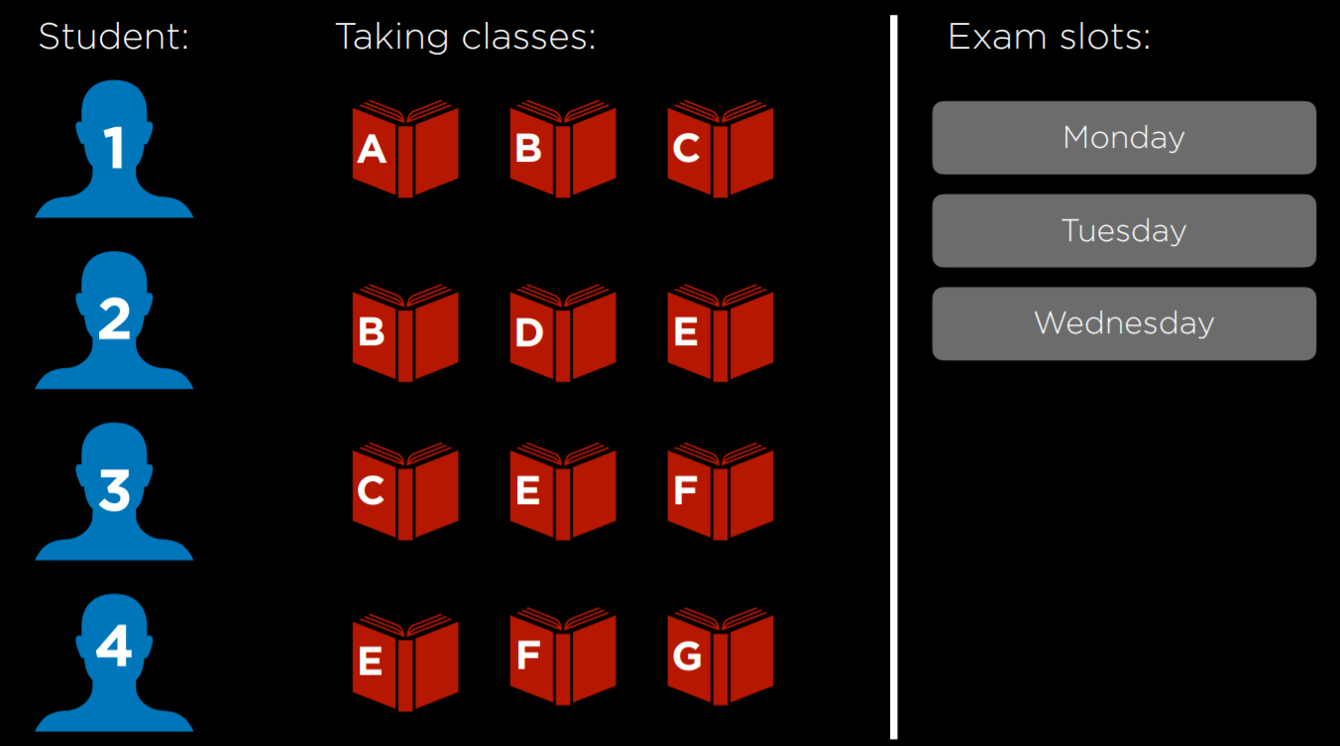

Questo problema può essere risolto usando vincoli che sono rappresentati come grafi.

Ogni nodo del grafo è un corso, e un arco viene disegnato tra due corsi se non possono avere esami nello stesso giorno, quindi non soddisfano il vincolo.

In questo caso, il grafo sarà chiamato **Grafo Vincolato** e quello di quest'esempio è:

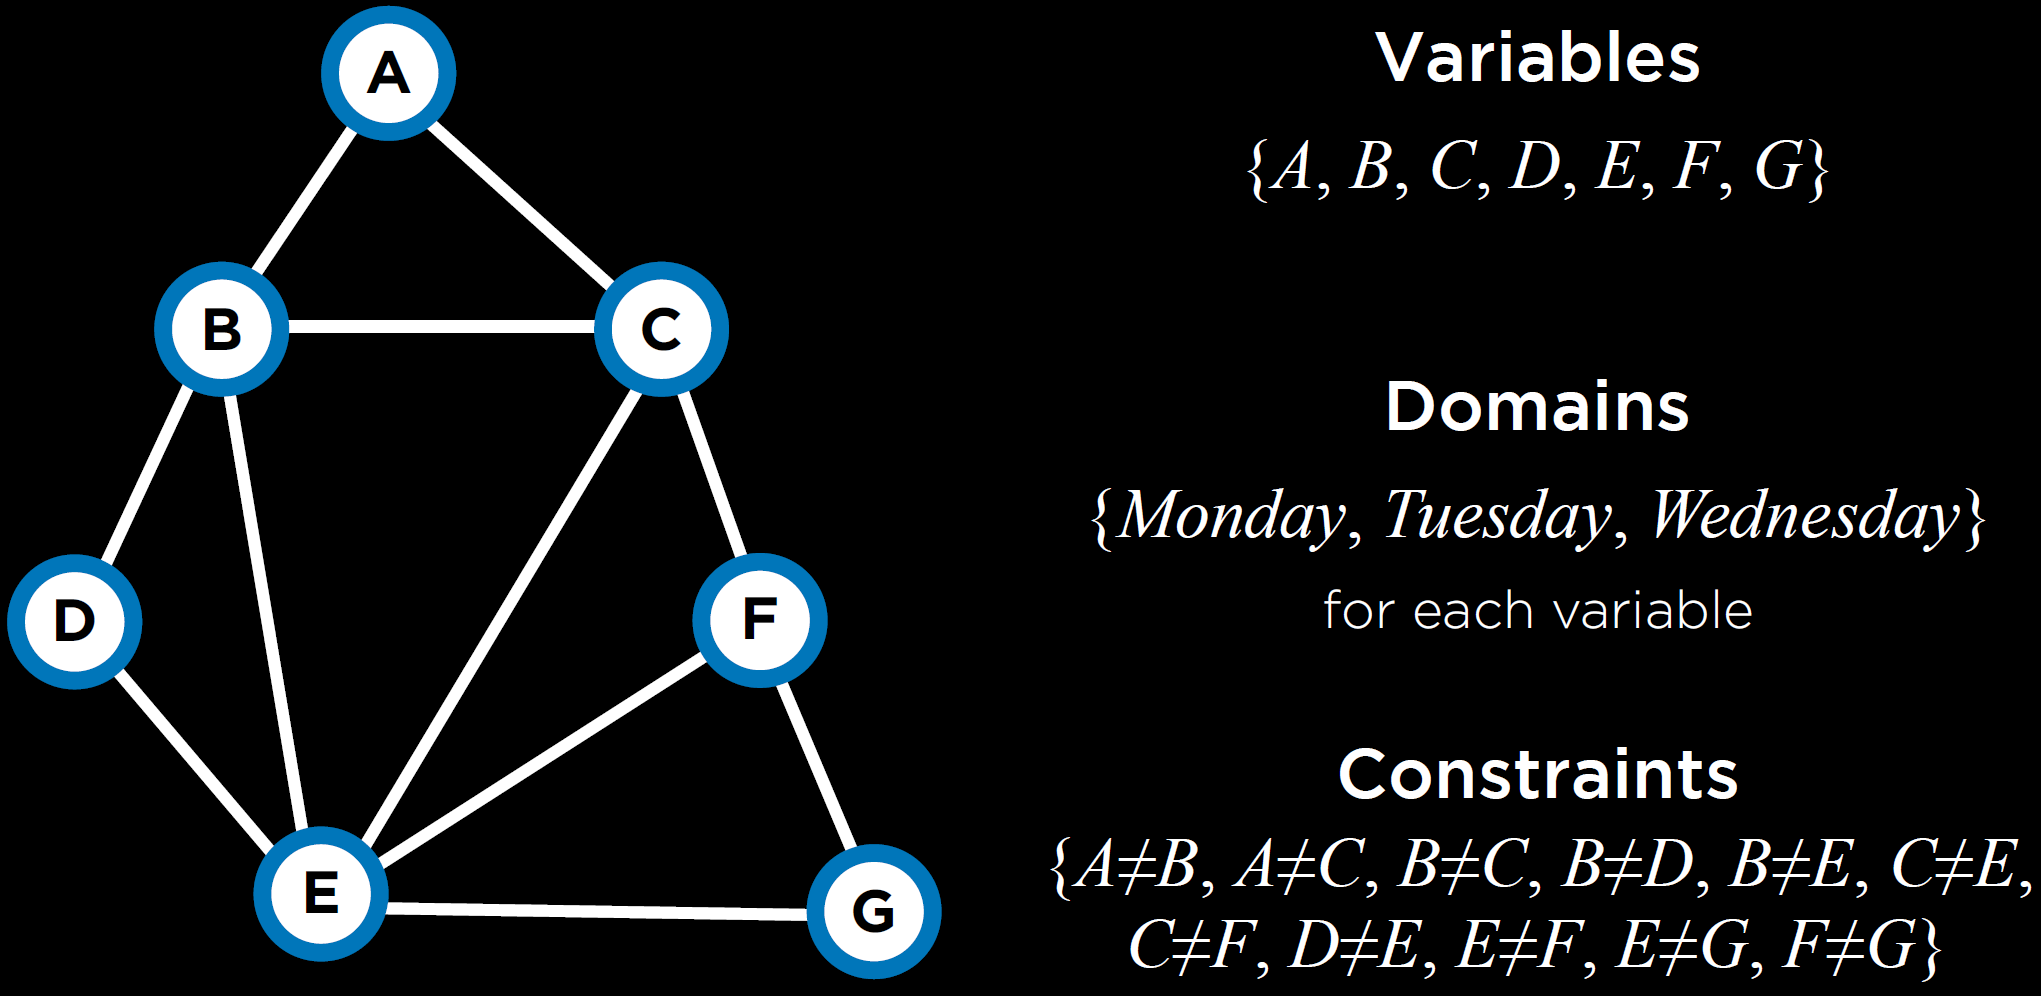

### Esempio 2

Sudoku può essere rappresentato come un problema di Constraint Satisfaction, in cui ogni cella vuota è una variabile, il dominio sono i numeri 1-9 e i vincoli sono che le celle non possono essere uguali tra loro.

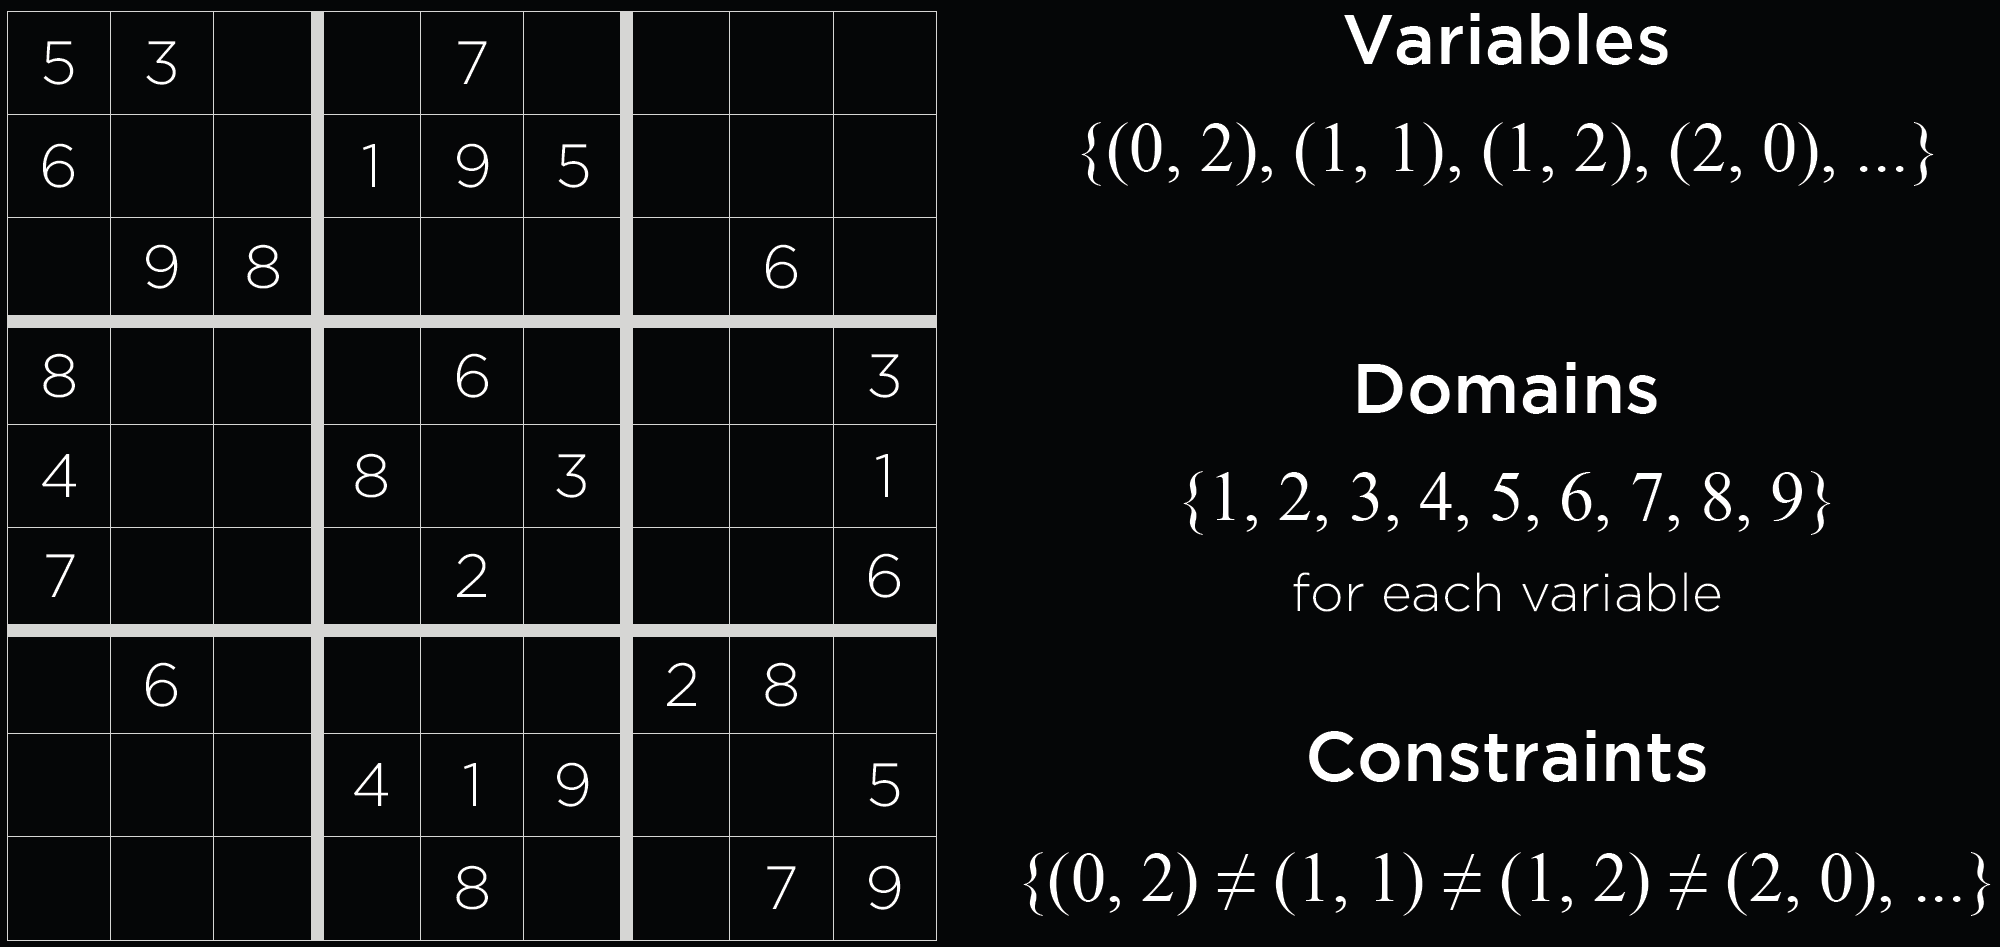

# Node Consistency

**Consistenza Nodale** (Node Consistency)
: tutti i valori appartenenti al dominio di una variabile soddisfano il *vincolo unario* di quella variabile.

- Nota che i vincoli unari sono vincoli *relativi* a una variabile, quindi si può parlare di consistenza nodale anche in caso di vincoli binari qualora sia presente, o si può ricavare, un vincolo unario su una delle variabili del vincolo binario.

## Esempio Node Consistency

Riprendendo parzialmente l'Esempio 1 sopra, usiamo un Grafo che contiene solo $A$ e $B$ e i cui domini siano, per entrambi: ${Mon, Tue, Wed}$

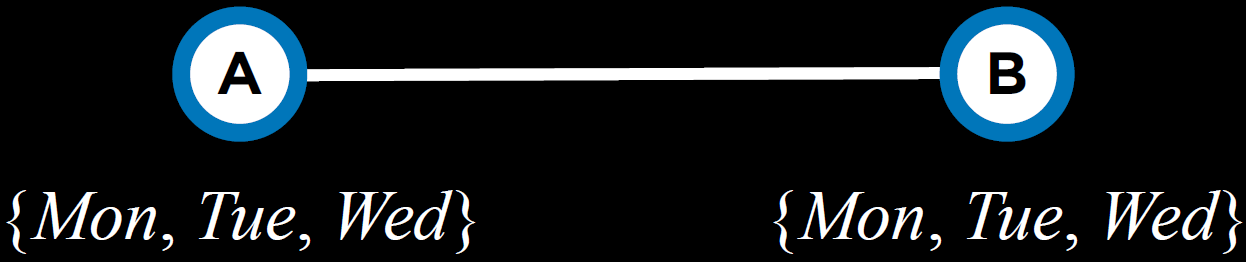

Coi seguenti vincoli:

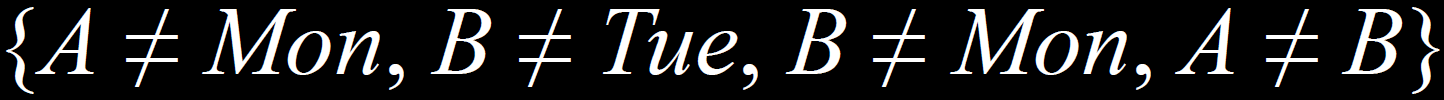

Non ho consistenza Nodale perché entrambi i nodi hanno, nel proprio dominio, valori che sono esclusi dai vincoli.

Se, però, rimuovo lunedì dal dominio di $A$ poi rimuovo lunedì e martedì dal dominio di $B$, ottengo consistenza nodale sia per $A$ che per $B$

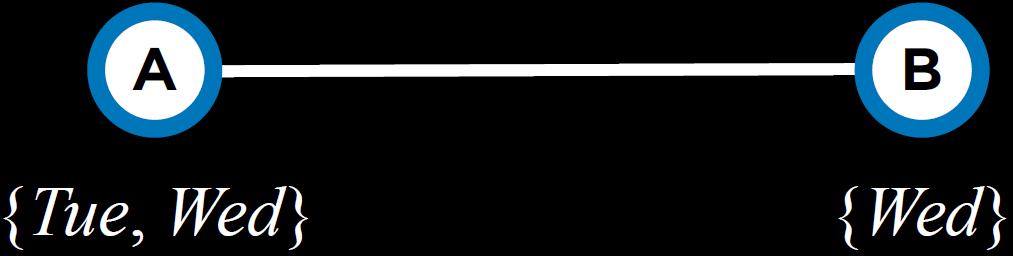

# Arc Consistency

**Consistenza degli Archi** (Arc Consistency)
: tutti i valori nel dominio di una variabile soddisfano i *vincoli binari* di quella variabile.
- In altre parole, per rendere $A$ "arc-consistent" rispetto a $B$, rimuovi elementi dal dominio di $A$ finché, per ogni scelta nel dominio di $A$, posso effettuare una scelta consistente nel dominio di $B$



## Esempio di Arc-Consistency

Dato il grafo semplificato di prima, valutiamo il vincolo binario sull'arco che collega i nodi.

Notiamo che il vincolo è $A ≠ B$, e $A$ contiene `Wed` nel suo dominio. Rimuoviamo, quindi, `Wed` dal dominio di $A$ e ora abbiamo un grafo arc-consistent

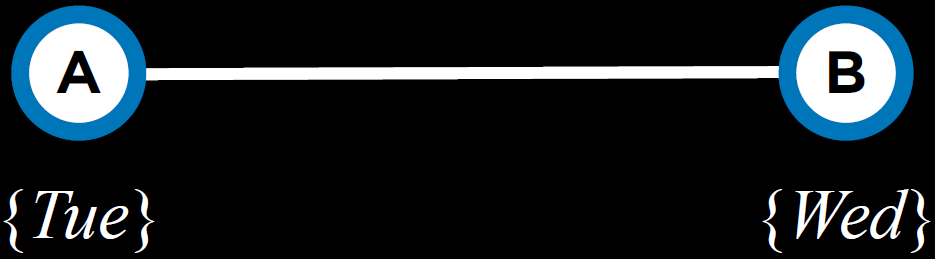

## Algoritmo di Arc-Consistency

Vogliamo codificare, in pseudo-codice, come eseguire un controllo per determinare se un grafo è arc-consistent.

Iniziamo definendo una funzione che chiameremo `Revise` (revisione).

Questa funzione cercherà di rendere `X` arc-consistent con `Y`, quindi rimuoverà valori dal dominio di `X` che non permettono possibili opzioni di `Y`

Argomenti:
- `csp`: constraint satisfaction problem
- `X` e `Y`: variabili

Esecuzione:
- Controllo se ho già eseguito una revisione. `Revise` ritorna `False` se non ho fatto una revisione o `True` se l'ho fatta.
- Loop su tutte le variabili `x` del dominio di `X`
  - Se nessun valore `y` del dominio di `Y` soddisfa il vincolo per `X` e `Y`:
    - Cancelliamo il valore corrente di `x`
    - Confermiamo che abbiamo effettuato una revisione
- Restituiamo `revised`

___
```
function Revise([csp], X, Y):

    [revised] = [false]
    for [x] in [X.domain]:
    if no [y] in [Y.domain] satisfies constraint for [(X,Y)]:
        delete [x] from [X.domain]
        [revised] = [true]
    return [revised]
```


### Algoritmo: AC-3

Chiamato `AC-3`

Forza arc-consistency in tutto il problema.

Lo fa mantenendo una `queue` di tutti gli archi che deve rendere consistenti, che diminuirà o aumenterà di dimensione a seconda di ciò che dovremo fare.

Pseudo-codice:

Argomenti:
- `csp`: constraint satisfaction problem

Esecuzione:

- Creiamo una queue che contiene tutti gli archi del nostro problema
- Finché la `queue` non è vuota, eseguiamo:
  - Rimuoviamo un argomento dalla `queue`, che ci ritorna `X` che deve essere arc-consistent con `Y`
  - Se abbiamo effettuato la revisione (quindi abbiamo modificato il dominio di `X` rispetto a `Y`) di questi due nodi:
    - Se la dimensione del dominio di `X` è vuota:
      - ritorna `False`
    - Se non è vuota, per ogni vicino `Z` di `X` che non è `Y`
      - Aggiungi alla coda il controllo di `Z` arc-consistent con `X` (perché dobbiamo rivalutare tutti i vincoli binari a seguito delle ri-assegnazioni)
- Ritorna `True`
___
```
function AC-3([csp]):

    [queue] = all arcs in [csp]
    while [queue] non-empty:
        [(X, Y)] = Dequeue([queue])
        if [Revise(csp, X, Y)]:
            if size of [X.domain] == 0:
                return [false]
            for each [Z] in [X.neighbors] - [{Y}]:
                Enqueue([queue], [(Z,X)])

    return [true]
```

#### Esempio con grafo

Notiamo che applicando l'algoritmo di Arc-Consistency al grafo degli studenti:

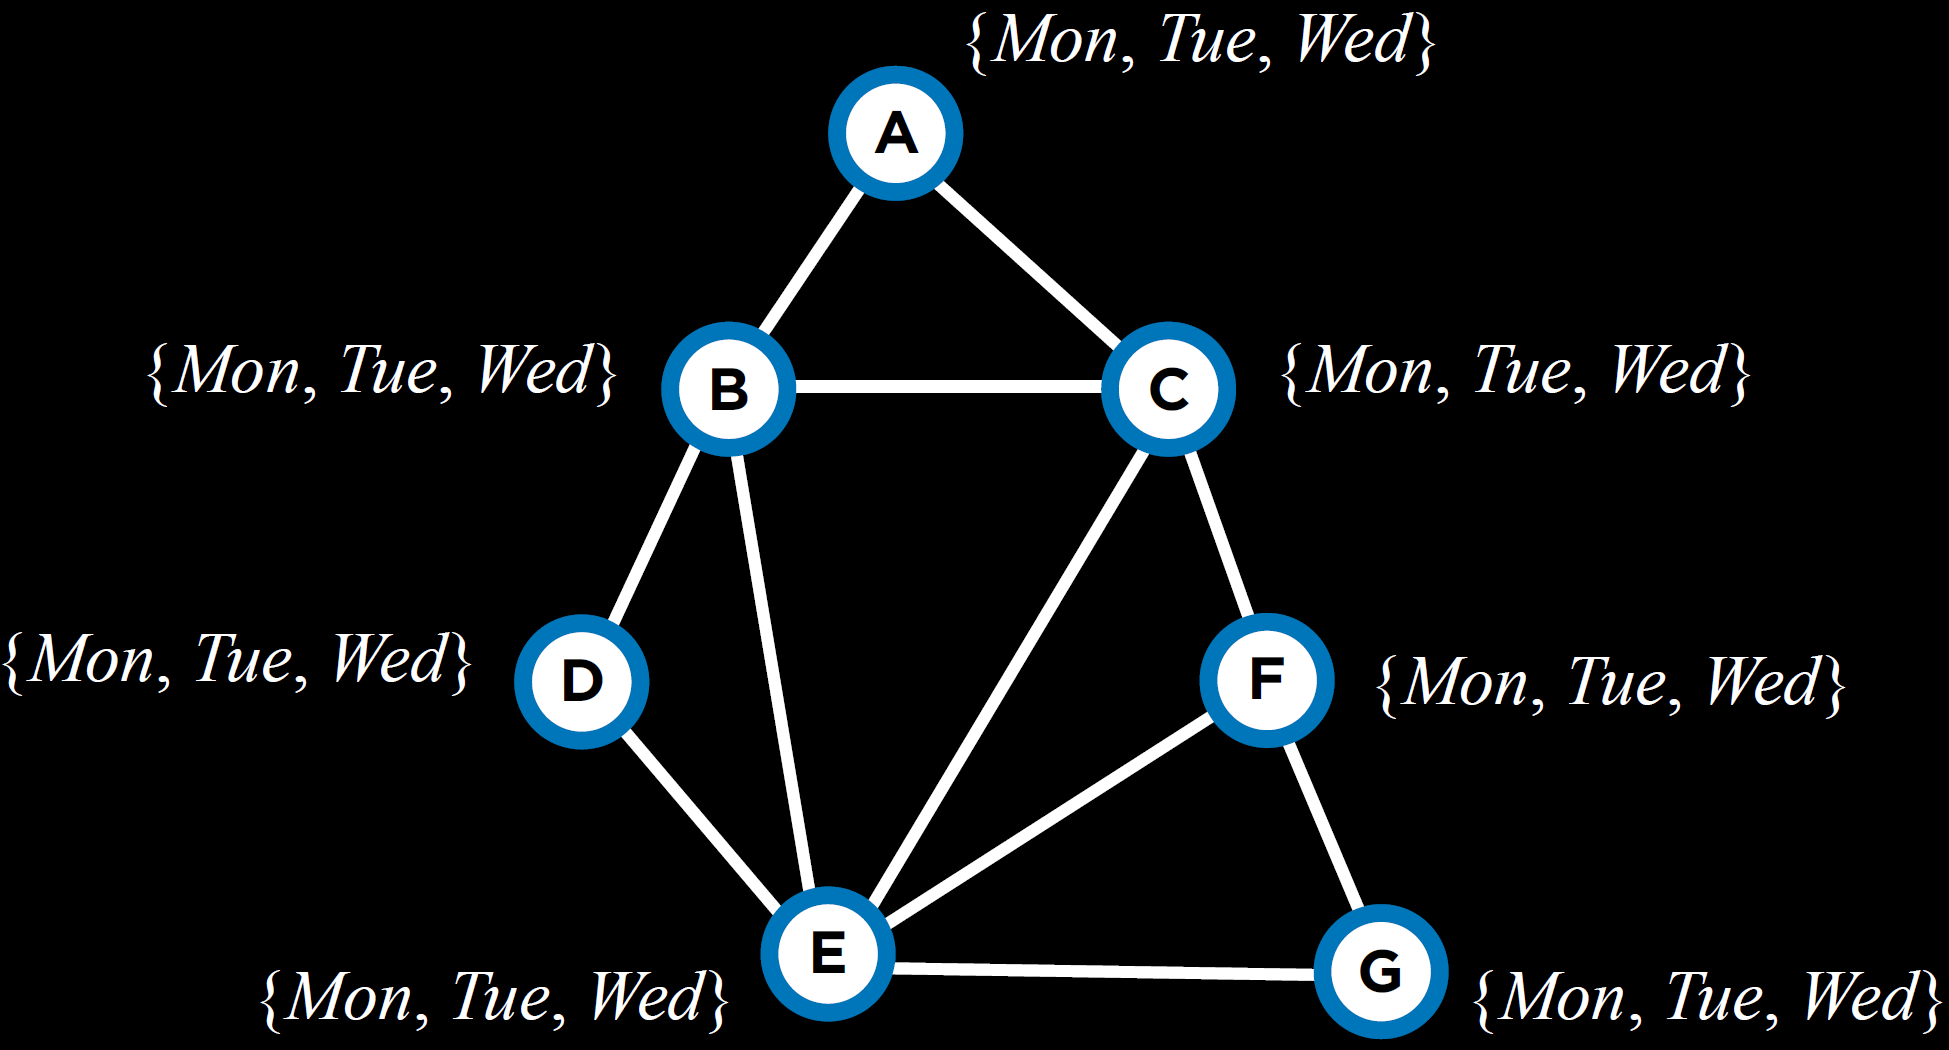

Il problema non viene esattamente risolto, perché stiamo considerando consistenza solo tra 2 nodi alla volta, ma con interconnessioni multiple rischiamo di ridurre domini senza trovare una soluzione, rischiando di creare domini vuoti, rendendo quindi l'Arc-Consistency impossibile.

Dobbiamo quindi *cercare* una soluzione ottimale.

## Arc-Consistency come problema di Ricerca

Iniziamo col ricordarci le proprietà dei problemi di ricerca

### Proprietà dei problemi di ricerca

- Initial state
- Actions
- Transition model
- Goal test
- Path cost function

### Arc-Consistency come ricerca:

- **Initial state**
: assegnamento vuoto. Nessuna variabile ha un valora assegnato.
- **Actions**
: aggiungi `{variable = value}` agli assegnamenti. Cioè, diamo un valore a una variabile
- **Transition model**
: mostra come l'assegnazione di un valore cambi le assegnazioni.
  - Cioè, il modello di transizione restituisce lo stato che include l'assegnazione a seguito dell'ultima azione eseguita.
- **Goal test**
: Controlla se tutte le variabili hanno un valore assegnato e tutti i vincoli sono soddisfatti.
- **Path cost function**
: tutti i percorsi hanno lo stesso costo.
  - Come menzionato prima, rispetto ai classici problemi di ricerca, i problemi di ottimizzazione si interessano più della soluzione piuttosto che del percorso per raggiungerla.

Tuttavia affrontare un *Constraint Satisfaction Problem* in maniera ingenua, cioè trattarlo come un semplice problema di ricerca, è parecchio inefficiente.

Possiamo utilizzare la struttura dei CSP per risolverli in maniera più efficiente, con **Backtracking Search**

# Backtracking Search

È un algoritmo che tiene conto della struttura di un CSP.

In generale, è una funzione ricorsiva che cerca continuamente di assegnare valori questi soddisfano i vincoli.

Se i vincoli vengono violati, prova un'assegnazione diversa.

## Pseudocodice Backtracking Search
Argomenti:
- `assignment`: assegnazione del tipo $A = 4$
- `csp`: Constraint Satisfaction Problem

Esecuzione:
- Se l'assegnazione è già vera:
  - Ritorna l'assegnazione
- Altrimenti, seleziona una variabile non assegnata
- Itera nel dominio della variabile non assegnata
  - Se il valore è consistente con l'assegnazione
    - Aggiungi variabile = valore alle assegnazioni
    - Ri-esegui ricorsivamente Backtrack e riportalo come risultato
    - Se il risultato della ricorsione non è un fallimento:
      - Ritorna il risultato appena ottenuto
  - Altrimenti, rimuovi l'assegnazione variabile = valore dalle assegnazioni
- Se in tutti i cicli non troviamo un risultato decente, ritorna il fallimento
___
```
function Backtrack([assignment], [csp]):

    if [assignment] complete:
        return [assignment]
    [var] = Select-Unassigned-Var([assignment], [csp])
    for value in Domain-Values([var], [assignment], [csp]):
        if [value] consistent with assignment:
            add [{var = value}] to [assignment]
            result = Backtrack([assignment], [csp])
            if [result] ≠ [failure]:
                return [result]
        remove [{var = value}] from [assignment]
    return [failure]
```

### Utilizzo dell'algoritmo

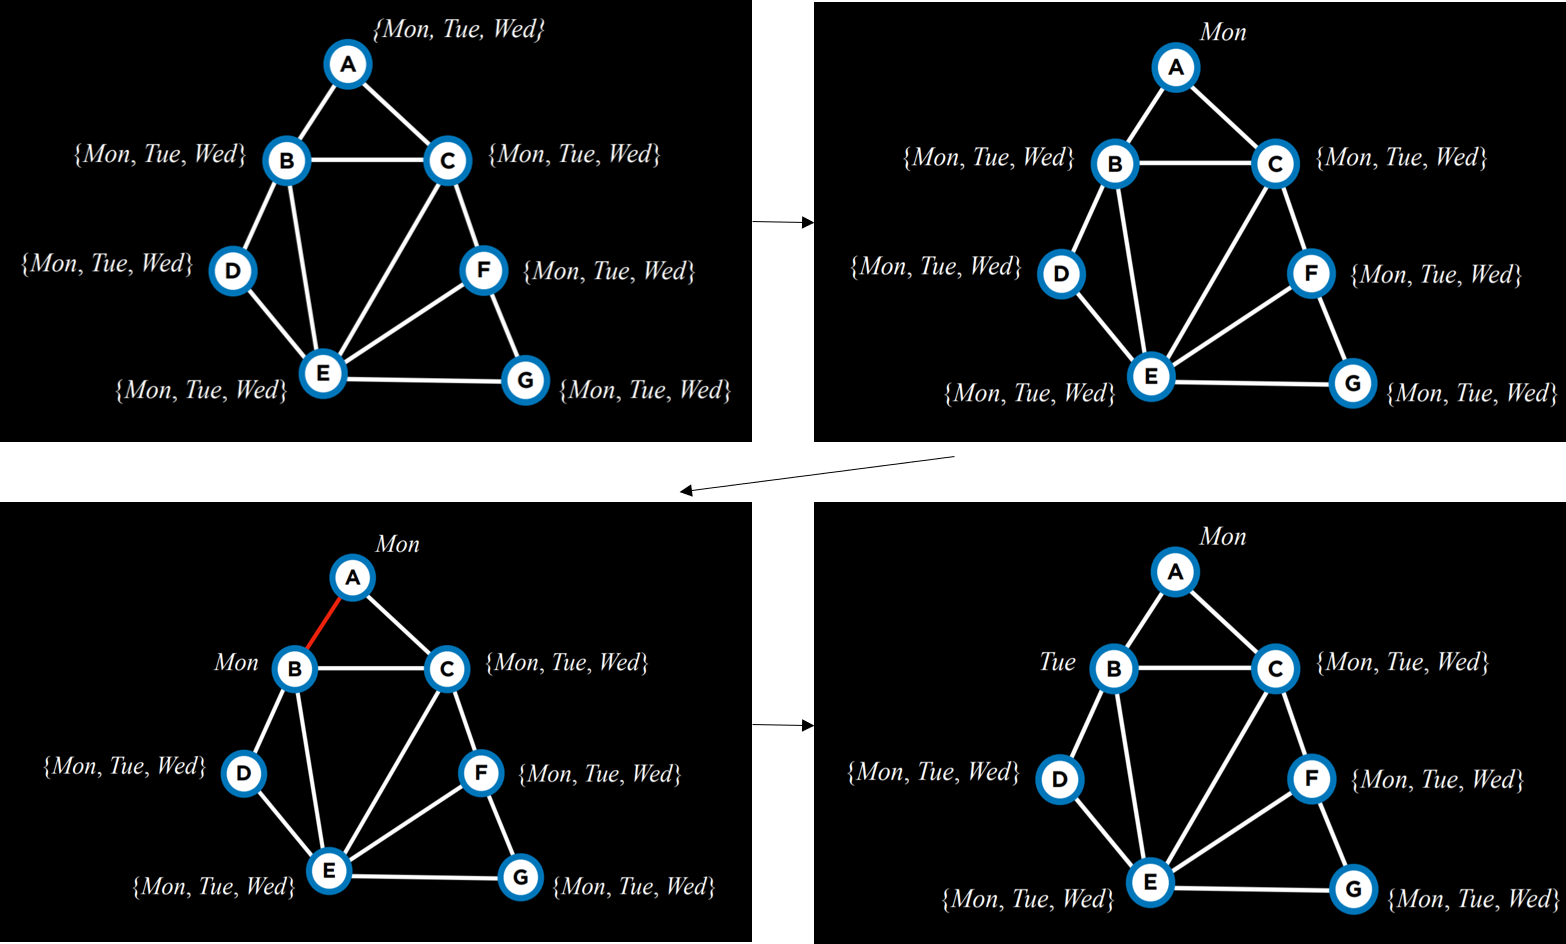

Come assegno un giorno a un esame per soddisfare i vincoli?

Inizio da un nodo qualsiasi, ad esempio $A$. Itero sui valori del suo dominio e scelgo `Mon`, cioè lunedì.

Passo a $B$, scelgo `Mon` e controllo se vìola i vincoli. I valori sono uguali quindi non soddisfa il vincolo. Vado avanti con l'iterazione e scelgo `Tue`, che soddisfa il vincolo.

Itero poi su $D$: $D=$`Mon` non va in conflitto con $B$. Arrivo ad $E$: `Mon` va in conflitto con $D$, `Tue` va in conflitto con $B$, quindi scelgo $E=$`Wed`.

Arrivo a $C$. Scelgo iterativamente i valori ma, qualsiasi valore scelgo, ho conflitti con $A$, $B$, o $E$:

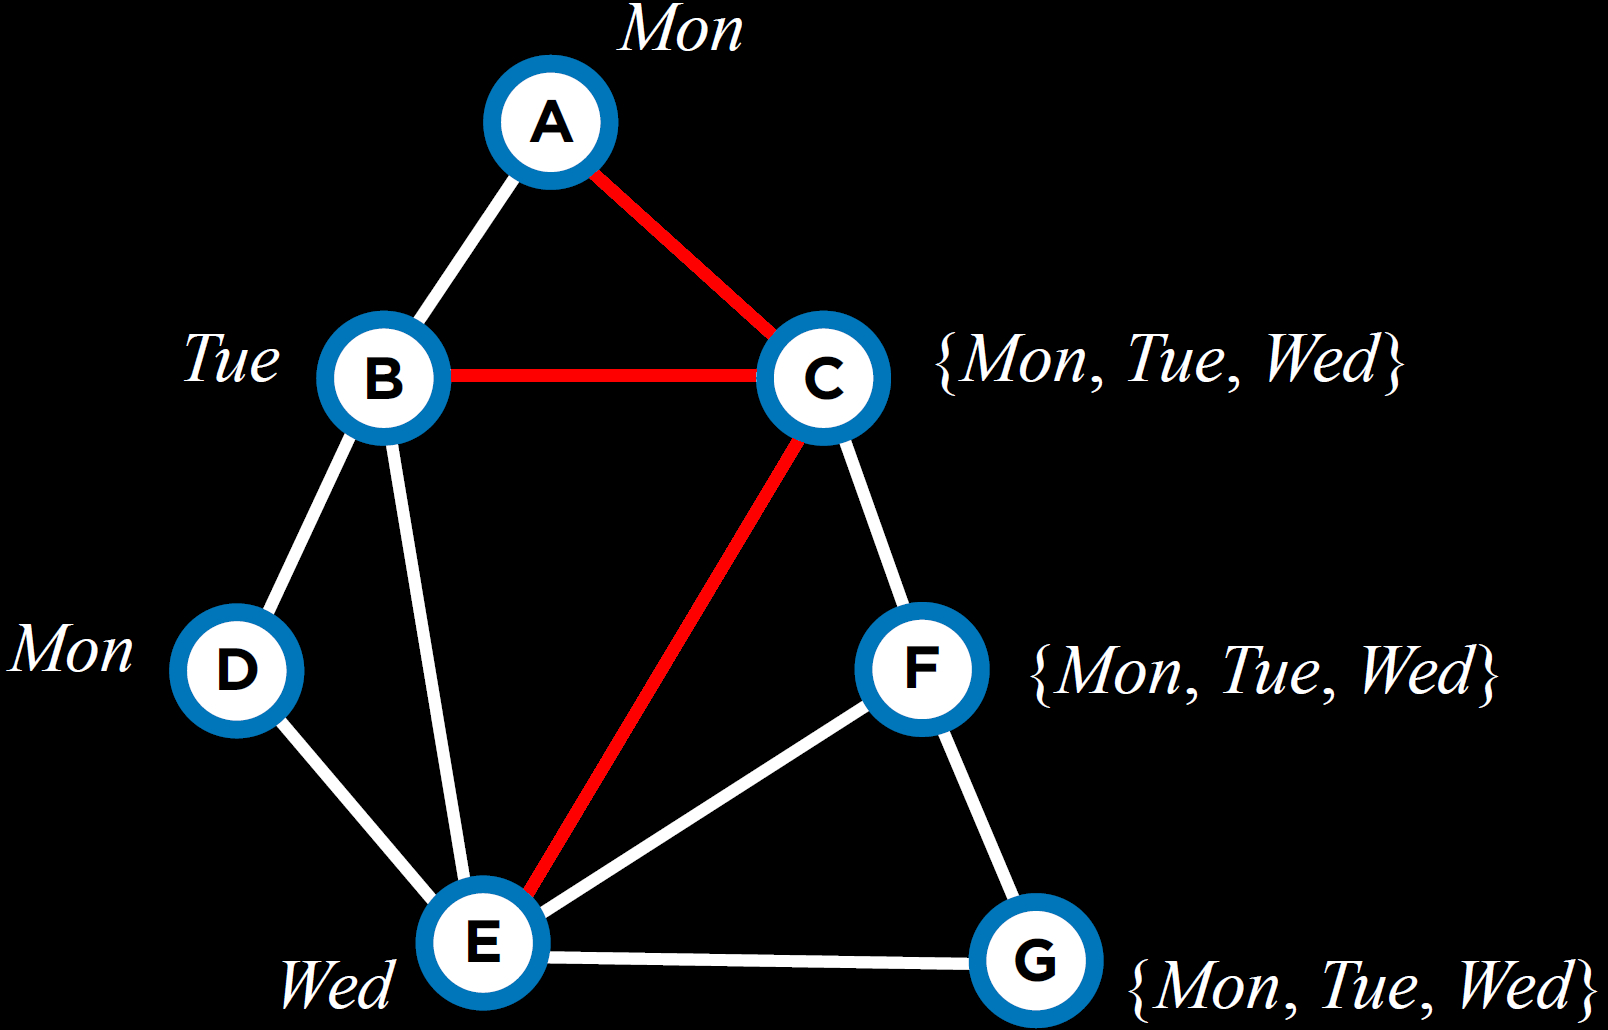

Facciamo backtrack, ritornando a $E$. Ma l'unico valore possibile accettabile da $E$ in questa configurazione era `Wed`, che ci ha portato al conflitto con $C$.

Faccio backtrack, ritornando a $D$. I valori che $D$ può assumere sono `Mon` e `Wed`. Siccome non ho avuto riscontri positivi con `Mon`, pongo ora $D=$`Wed`.

Reiterando quindi arriverò a questo valore di $C$, che non crea conflitti:

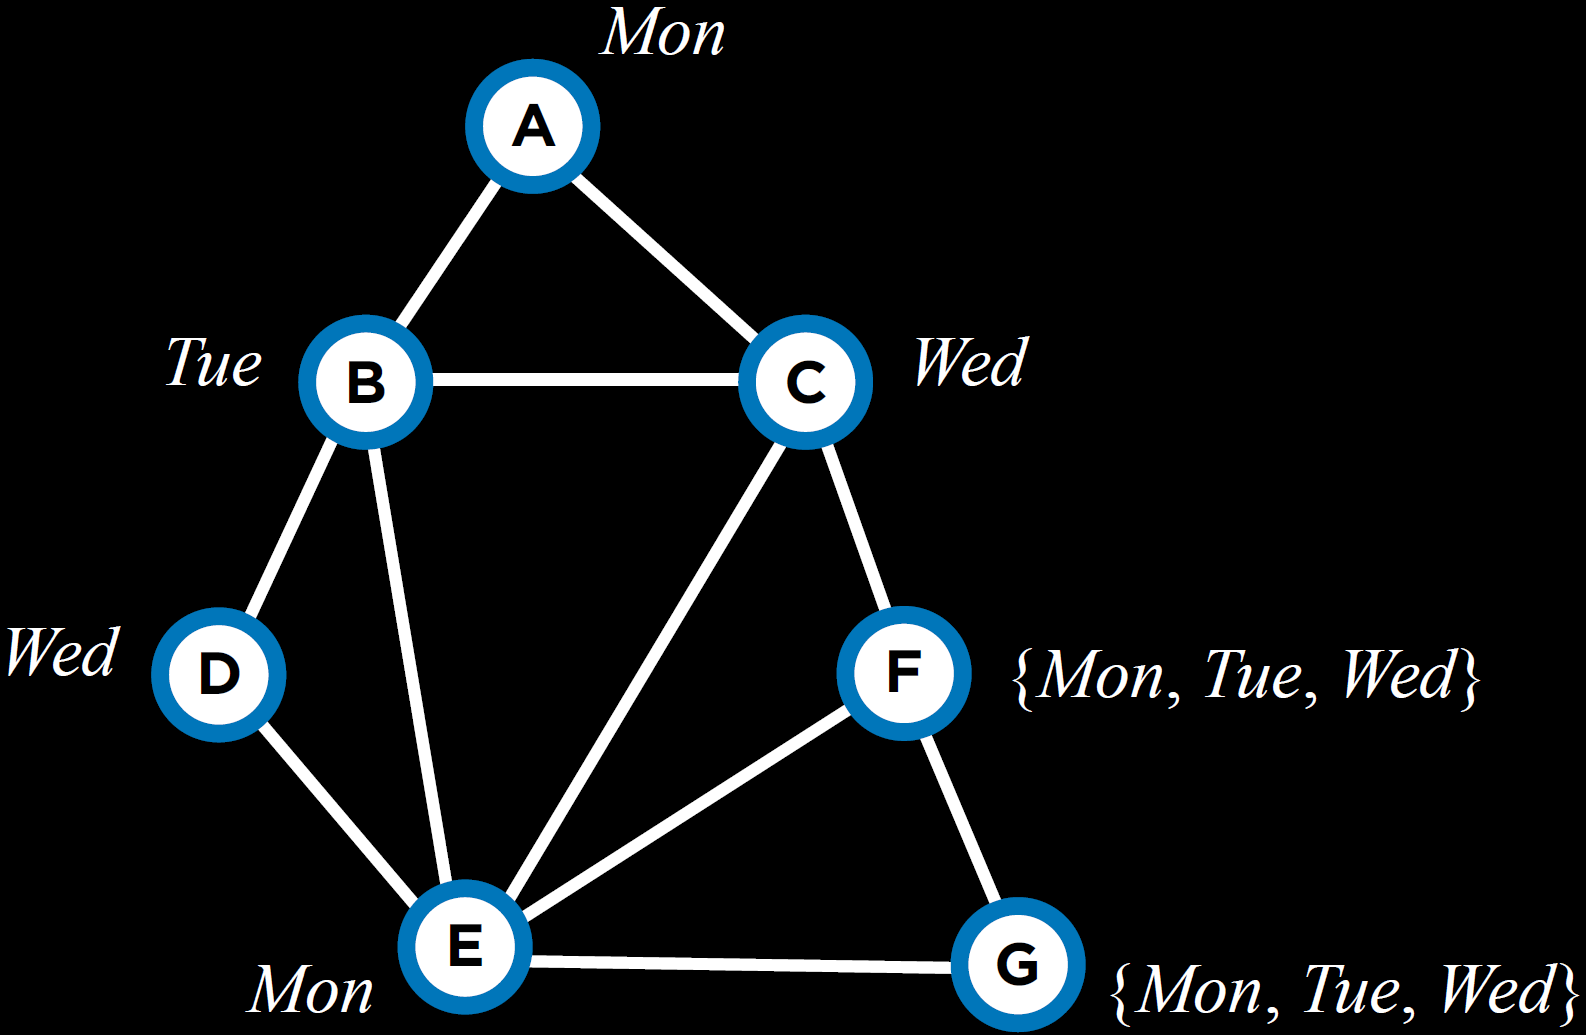

E riuscirò a iterare fino a risolvere il grafo in questa maniera:

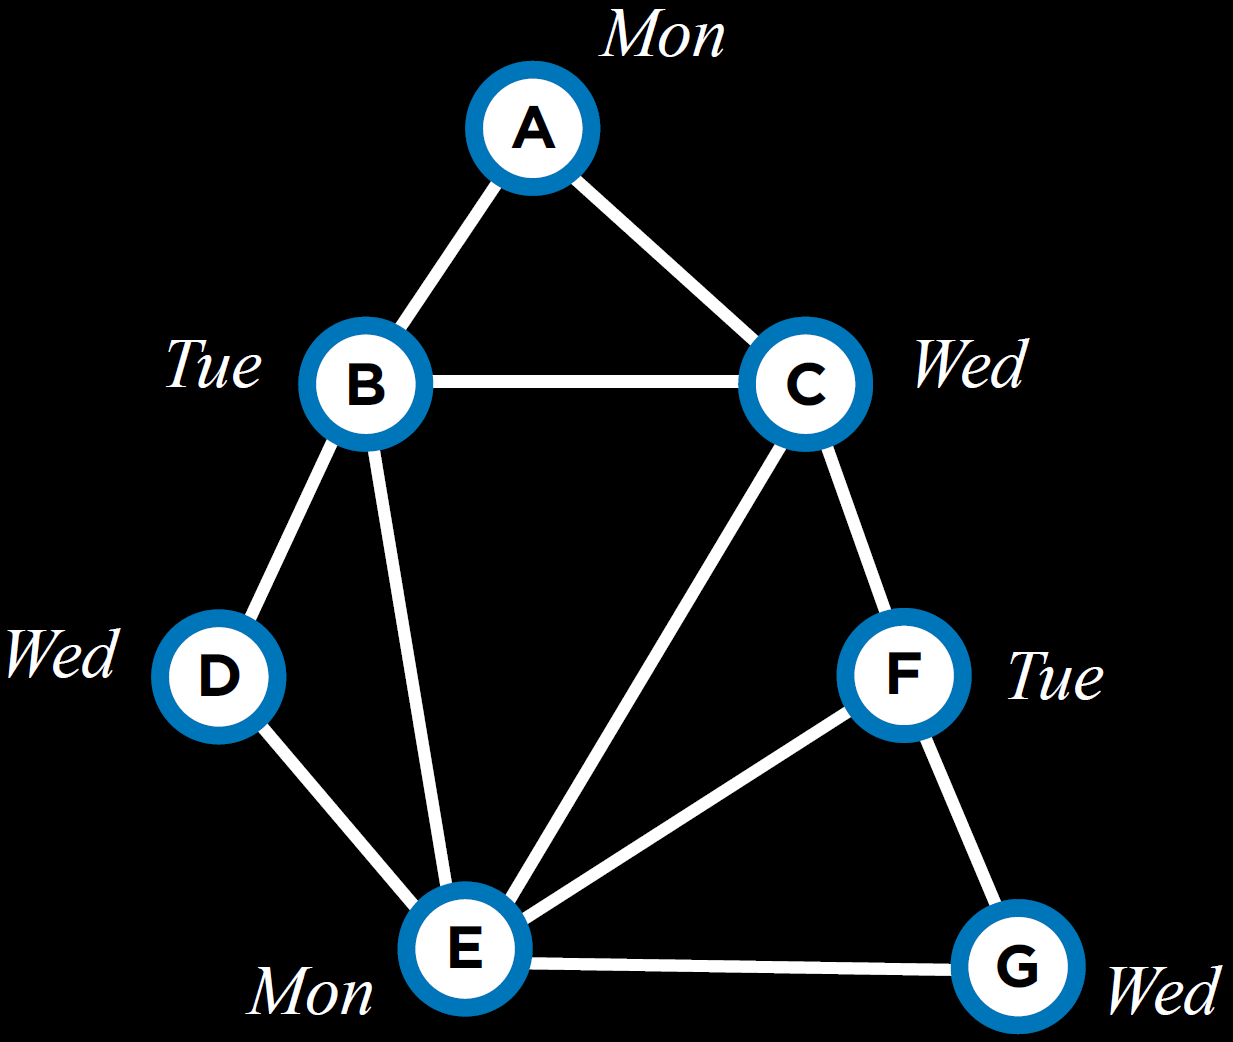

### Codice esempio di Backtracking Search senza funzione euristica o inferenza

In [schedule0.py](schedule0.py) vediamo un'implementazione del codice.

Tuttavia, l'utilizzo di quest'algoritmo è abbastanza comune da essere presente in più librerie, quindi è di facile applicazione.

In [schedule1.py](schedule1.py) vediamo un'implementazione del codice con la libreria python-constraints, installabile tramite `pip install python-constraints`

Con quest'ultima versione, riusciamo a trovare multiple soluzioni allo stesso problema e a valutarle tutte.

# Backtracking Search con Inferenza (Maintaining Arc-Consistency)

Anche se Backtracking Search sembra molto più efficiente di una ricerca normale, richiede ancora molta potenza computazionale.

Forzare l'arc-consistency, invece, consuma meno risorse.

Interlacciando Backtracking Search e Inferenza (forzando l'arc-consistency), otteniamo un algoritmo più efficiente.

L'algoritmo è chiamato **Maintaining Arc-Consistency**.

Questo algoritmo forza l'arc-consistency dopo ogni nuova assegnazione della Backtracking Search.

Nello specifico, dopo che facciamo una nuova assegnazione a `X`, l'algoritmo `AC-3`, iniziando con una queue di tutti gli archi `(Y,X)`, dove `Y` è un vicino di `X` (e non una queue di tutti gli archi del problema).

Nello pseudo-codice sotto, le aggiunte all'algoritmo di Backtracking search sono segnate come: < codice >

## Pseudocodice Backtracking Search con Inferenza
Argomenti:
- `assignment`: assegnazione del tipo $A = 4$
- `csp`: Constraint Satisfaction Problem

Esecuzione:
- Se l'assegnazione è già vera:
  - Ritorna l'assegnazione
- Altrimenti, seleziona una variabile non assegnata
- Itera nel dominio della variabile non assegnata
  - Se il valore è consistente con l'assegnazione
    - Aggiungi variabile = valore alle assegnazioni
    ___
    - Genera inferenze richiamando AC-3
    - Se le inferenze non sono fallimenti
      - Aggiungi le inferenze alle assegnazioni
    ___
    - Ri-esegui ricorsivamente Backtrack e riportalo come risultato
    - Se il risultato della ricorsione non è un fallimento:
      - Ritorna il risultato appena ottenuto
  - Altrimenti, rimuovi l'assegnazione variabile = valore <u>e le inferenze</u> dalle assegnazioni
- Se in tutti i cicli non troviamo un risultato decente, ritorna il fallimento
___
```
function Backtrack([assignment], [csp]):

    if [assignment] complete:
        return [assignment]
    [var] = Select-Unassigned-Var([assignment], [csp])
    for value in Domain-Values([var], [assignment], [csp]):
        if [value] consistent with assignment:
            add {var = value} to assignment

<           [inferences] = Inference([assignment], [csp])     >
<           if [inferences] ≠ [failure]:                      >
<               add [inferences] to [assignment]              >

            result = Backtrack([assignment], [csp])
            if [result] ≠ [failure]:
                return [result]

        remove [{var = value}] < and inferences > from [assignment]

    return [failure]
```

### Note

La funzione `Inference` esegue l'algoritmo `AC-3` come descritto precedentemente. L'output sono tutte le inferenze che possono essere fatte attraverso il forzamento dell'arc-consistency.

Letteralmente, questi sono tutte le nuove assegnazioni che possono essere dedotte dalle assegnazioni precedenti e la struttura del CSP.

Ci sono altri modi per rendere l'algoritmo più efficiente. Fino ad ora abbiamo selezionato una variabile non inizializzata casualmente. Tuttavia, alcune scelte hanno più probabilità di portarci a una soluzione in maniera più veloce rispetto ad altre.

Questo richiede l'uso di funzioni euristiche. Un'euristica è una regola pratica che, abbastanza spesso, porta a una soluzione migliore rispetto a quando si usa un approccio ingenuo, ma non è comunque garantito.

## Funzioni euristiche per Backtracking Search

Euristiche che operano su `Select-Unassigned-Var([assignment], [csp])`:
- Minimum Remaining Values (MRV)
- Degree

Euristica che opera su `Domain-Values([var], [assignment], [csp])`:
- Least Constraining Values

### Minimum Remaining Values (MRV)

**Regola:** seleziona la variabile che ha il dominio di dimensioni minori.

Se il dominio di una variabile è stato ridotto dall'inferenza, e ora ha solo un valore rimasto (o anche se sono due valori), allora facendo quest'assegnazione ridurremmo il numero di backtracks che avremmo bisogno di fare in futuro.

Cioè, prima o poi dovremo fare quest'assegnazione, visto che è stata inferita dal forzamento dell'arc-consistency. Se quest'assegnazione porta a un fallimento, è meglio scoprirlo prima di aver bisogno di fare backtrack.

Tuttavia non è possibile usare quest'algoritmo quando più variabili hanno un dominio di dimensione uguale.

#### Esempio MRV

Dopo aver ridotto i domini delle variabili nell'assegnazione attuale, usando l'euristica MRV sceglieremo la variabile $C$ come assegnazione successiva e selezioneremo `Wed`

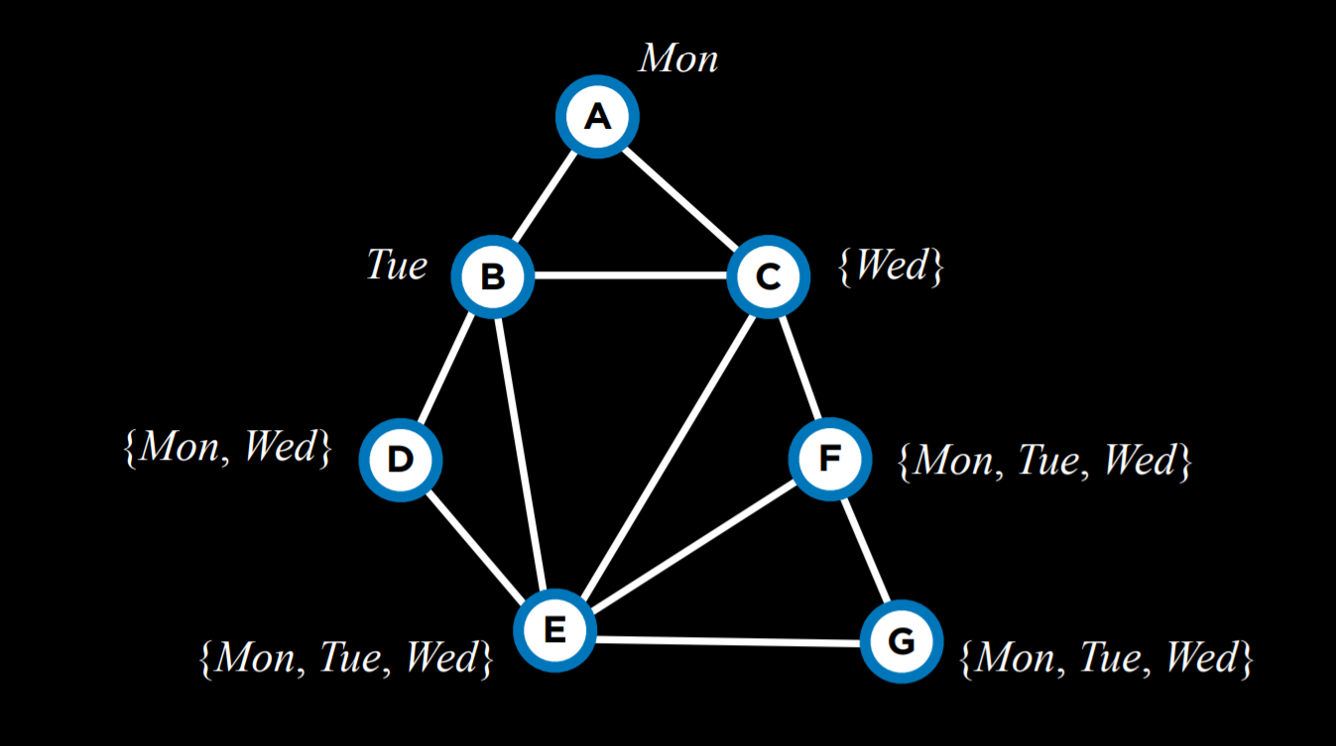

### Degree

**Regola:** seleziona la variabile di grado più alto

Il grado di una variabile rappresenta il numero di archi che la connettono ad altre variabili. Scegliendo la variabile col grado più alto, con una sola assegnazione riusciamo a vincolare più variabili in una volta sola, velocizzando il processo dell'algoritmo.

Non è possibile, però, usare quest'algoritmo quando ci sono più variabili con lo stesso grado.

#### Esempio Degree

Tutte le variabili hanno un dominio della stessa dimensione, quindi dovremmo scegliere quello col grado più alto, cioè $E$

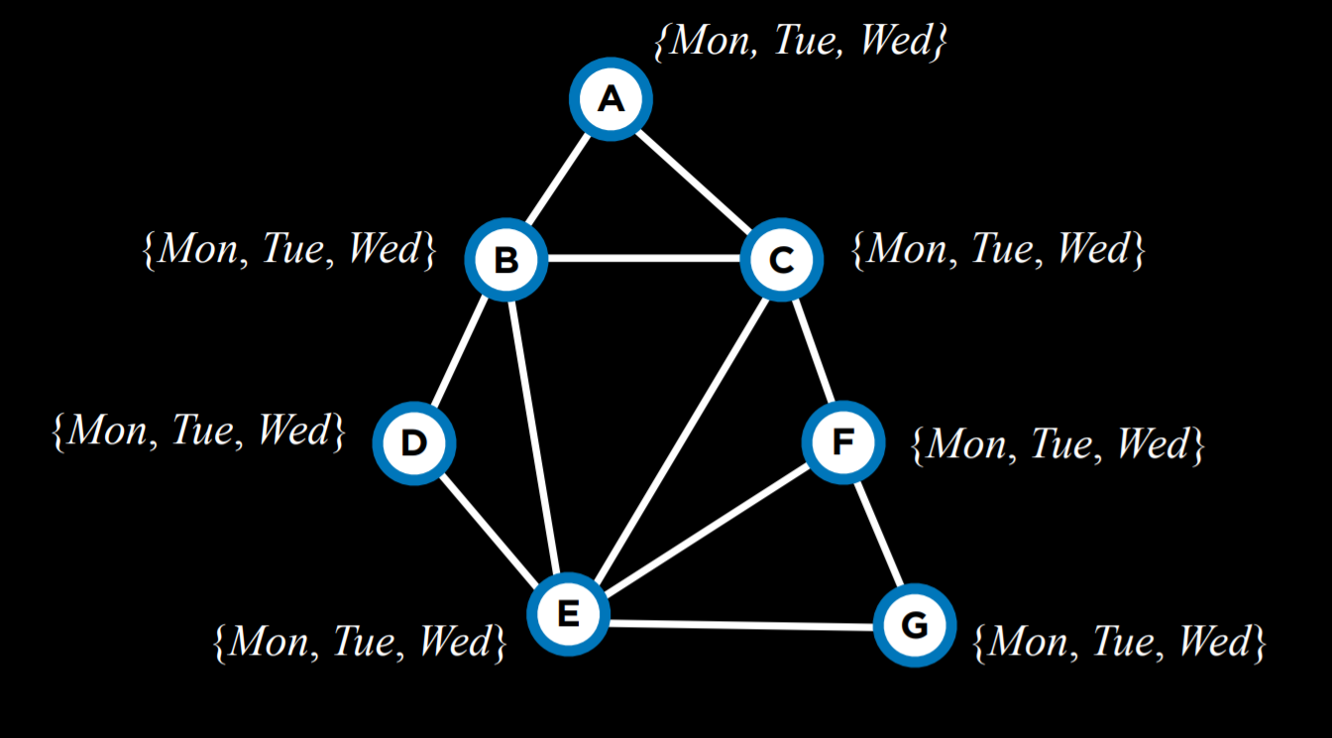

### Least Constraining Values (LCV)

**Regola:** Ritorna variabili in ordine di numero di scelte che sono escluse per variabili vicine. Cioè, tenta prima i valori meno vincolanti.

Selezioniamo un valore del dominio della variabile che influirà sul dominio di meno vicini possibili.

Cioè, vogliamo scegliere il valore della variabile che vincola meno vicini possibili, in modo da evitare problemi.

Questo algoritmo può essere combinato con **MRV** o **Degrees**.

Quando usata con **Degrees**, stiamo selezionando la variabile con grado più alto e decidendo di usare il valore che crea meno problemi al grafo.

#### Esempio Least Contraining Value (LCV)

Consideriamo la variabile $C$. Se poniamo $C=$`Tue`, metteremmo un vincolo su $B$, $E$ e $F$.

Tuttavia, se scegliemo `Wed`, metteremmo un vincolo solo su $B$ e $E$. Probabilmente, quindi, è meglio scegliere `Wed`.

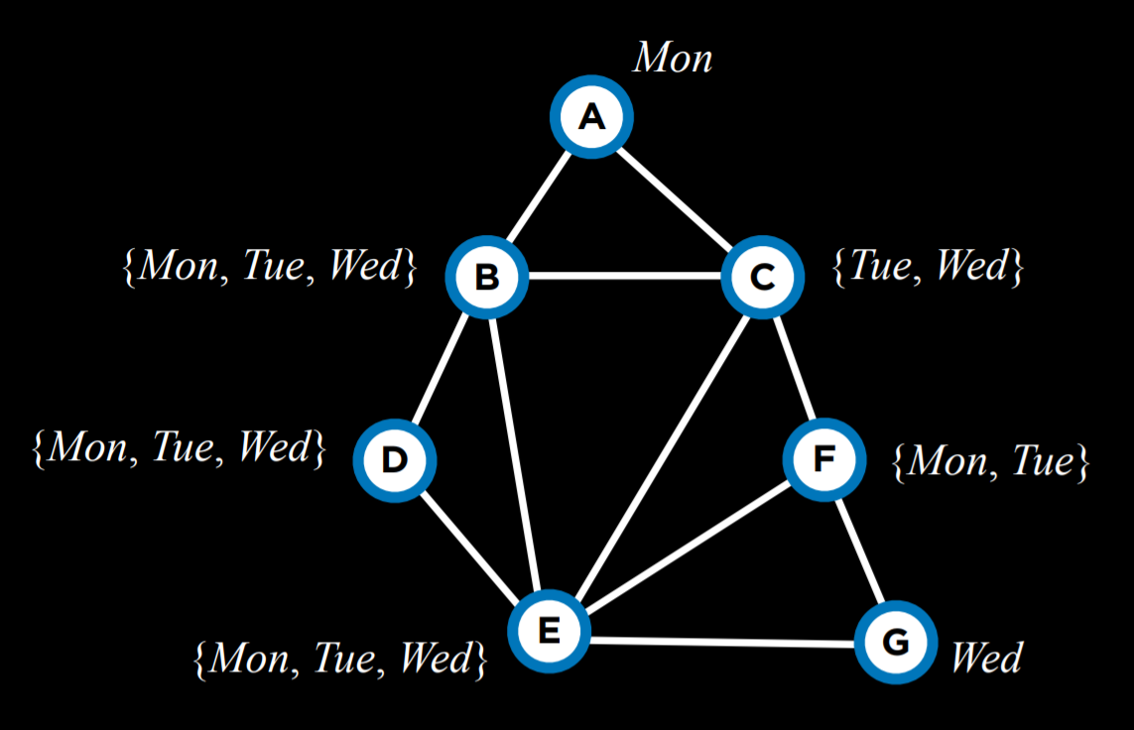

# Sommario

I problemi di ottimizzazione possono essere formulati in più modi. Qui abbiamo considerato:

- Local Search
- Linear Programming
- Constraint Satisfaction

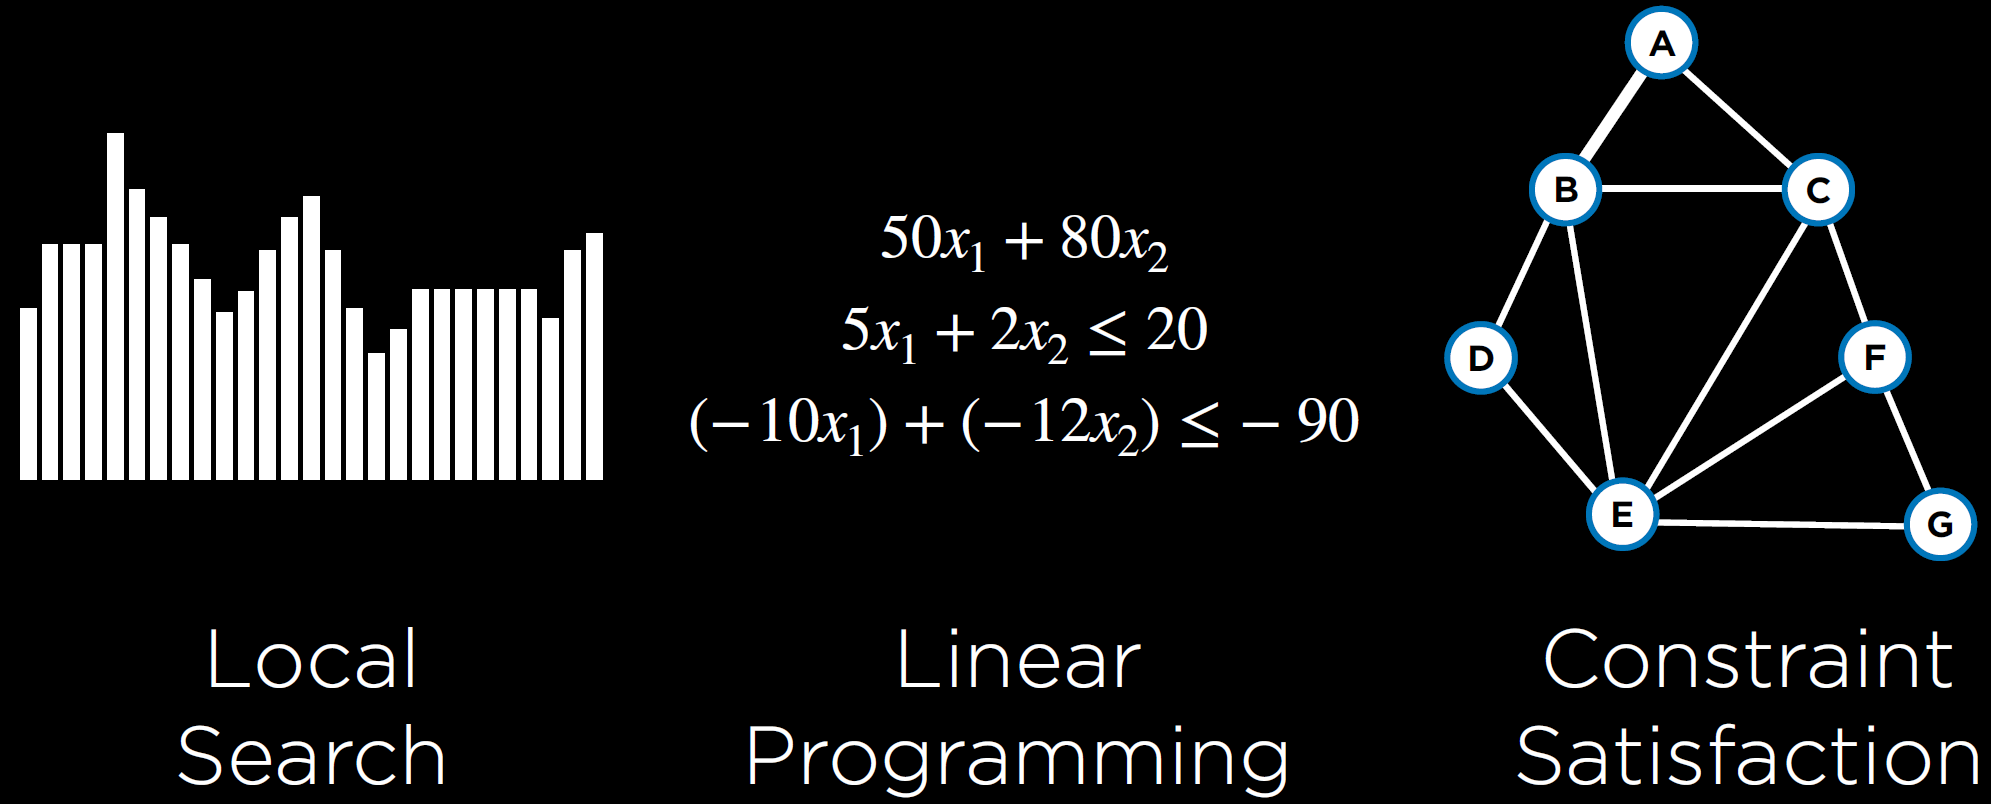